# Launch FEDOT

In [ ]:
pip install fedot==0.5.2

In [15]:
from fedot.api.main import Fedot
from sklearn.metrics import classification_report, roc_auc_score

from data.data import get_train_data, get_test_data

In [16]:
train_features, train_target = get_train_data()
test_features, test_target = get_test_data()

train_features

array([[0, nan, 1, 1, 1, 'monday', 'a ', 'true', 1, '0.1', 'a'],
       [nan, 1, 2, 2, 0, 'tuesday', 'a', nan, 0, '1.3', inf],
       [2, nan, 3, 3, nan, 3, 'b', 'false', 1, '?', 'c'],
       [3, nan, 4, 4, 3.0, 4, '  a  ', 'true', 0, '1.3', '1'],
       [4, nan, 5, 5.0, 0, 5, '   b ', nan, 0, '3.2', '2'],
       [5, nan, 6, 6, 0, 6, '   c  ', 'false', 0, '8.0', '3'],
       [6, inf, 7, 7, 0, 7, '    c  ', 'true', 1, '5.9', 'g'],
       [7, inf, 8, 8, 1.0, 1, ' b   ', nan, 0, '4.9', 'h'],
       [inf, inf, '9', '9', 2, 2, nan, 'true', 1, '2.0', 'i'],
       [9, inf, '10', '10', 2, 3, ' a  ', 'false', 0, '1.3', 'j'],
       [10, nan, 11.0, 11.0, 0, 4, 'a ', 'false', 0, '2.8', 'k'],
       [11, nan, 12, 12, 2.0, 5, nan, 'false', 1, '3.2', 'l'],
       [12, nan, 1, 1.0, 1.0, 6, ' c  ', 'false', 0, '11.1', 'm'],
       [13, nan, 2, 2, 1, 7, ' c  ', 'true', nan, '12.5', 'n'],
       [14, nan, 3, 3, 2.0, 1, 'b', 'false', nan, 'error', 'o'],
       [15, nan, 4, 4, 1, 2, 'b  ', 'false', nan, '

In [18]:
# Task selection, initialisation of the framework timeout in minutes 
fedot_model = Fedot(problem='classification', timeout=0.5)

# Fit model
obtained_pipeline = fedot_model.fit(features=train_features, target=train_target)

# Evaluate the prediction with test data
predict = fedot_model.predict(test_features)
predict_probs = fedot_model.predict_proba(test_features)

Feature column with index 4 contains following data types: ["<class 'int'>", "<class 'str'>"]. String cannot be converted into <class 'int'>. Drop column.


Generations:   1%|▌                                                             | 1/100 [00:00<?, ?gen/s]

Number of used CPU's: 1
Number of used CPU's: 1


Generations:   1%|▌                                                             | 1/100 [00:14<?, ?gen/s]

Hyperparameters optimization start


  4%|█▊                                            | 39/1000 [00:15<06:21,  2.52trial/s, best loss: -1.0]
Hyperparameters optimization finished
Return tuned pipeline due to the fact that obtained metric 1.000 equal or bigger than initial (- 5% deviation) 0.937


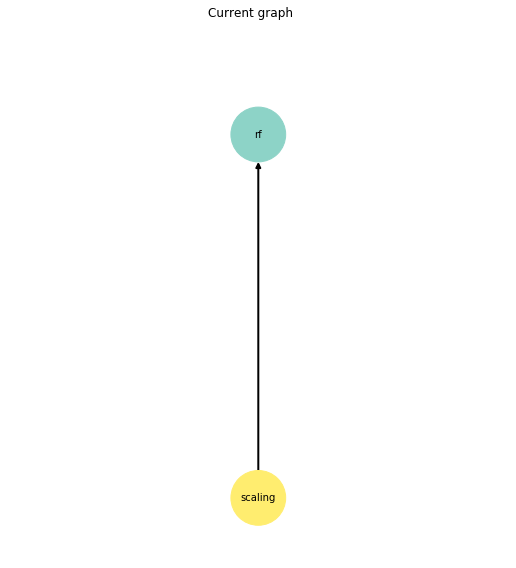

In [19]:
obtained_pipeline.show()

In [20]:
print(classification_report(test_target, predict))

roc_auc = roc_auc_score(test_target, predict_probs)
print(f'ROC AUC score: {roc_auc:.3f}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

ROC AUC score: 1.000
